In [30]:
#imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#mostrar graficos dentro del notebook
%matplotlib inline
#no mostrar warnings
import warnings
warnings.filterwarnings("ignore")

In [31]:
#leer csv
data = pd.read_csv('/Users/rod/Desktop/materias/machineLearning/finalProj/data/humanEvo.csv')

## Exploración de los datos

In [32]:
#shape del dataframe
data.shape

(12000, 28)

In [33]:
#mirar 3 muestras
data.head(3)

,Genus_&_Specie,Time,Location,Zone,Current_Country,Habitat,Cranial_Capacity,Height,Incisor_Size,Jaw_Shape,...,biped,Arms,Foots,Diet,Sexual_Dimorphism,Hip,Vertical_Front,Anatomy,Migrated,Skeleton
0,hominino Orrorin tugenencin,6.041124,Africa,oriental,Kenya,forest,144.51410,110.24323,small,conical,...,low probability,climbing,climbing,dry fruits,high,wide,no,old,no,light
1,hominino Ardipithecus ramidus / kabadda,4.383910,Africa,oriental,Ethiopia,mixed,293.96021,107.69018,small,conical,...,high probability,climbing,climbing,soft fruits,medium-high,wide,no,old,no,light
2,Australopithecus Afarensis,3.749413,Africa,oriental,Kenya,mixed,264.79849,123.76644,big,U shape,...,yes,climbing,walk,dry fruits,high,slim,no,old,no,refined


In [34]:
# ahora vemos si hay valores faltantes y cuántos
print(f"valores faltantes: {data.isna().sum()}")

valores faltantes: Genus_&_Specie             0
Time                       0
Location                   0
Zone                       0
Current_Country            0
Habitat                    0
Cranial_Capacity           0
Height                     0
Incisor_Size               0
Jaw_Shape                  0
Torus_Supraorbital         0
Prognathism                0
Foramen_Mágnum_Position    0
Canine Size                0
Canines_Shape              0
Tooth_Enamel               0
Tecno                      0
Tecno_type                 0
biped                      0
Arms                       0
Foots                      0
Diet                       0
Sexual_Dimorphism          0
Hip                        0
Vertical_Front             0
Anatomy                    0
Migrated                   0
Skeleton                   0
dtype: int64


In [35]:
#miremos los valores unicos de nuestra variable dependiente 
print(f'valores únicos de Genus_&_Specie: {data["Genus_&_Specie"].unique()}')

valores únicos de Genus_&_Specie: ['hominino Orrorin tugenencin' 'hominino Ardipithecus ramidus / kabadda'
 'Australopithecus Afarensis' 'Australopithecus Anamensis'
 'Australopithecus Africanus' 'Homo Rodhesiensis'
 'hominino Sahelanthropus tchadensis' 'Homo Neanderthalensis\n'
 'Paranthropus Aethiopicus' 'Homo Erectus' 'Homo Naledi'
 'Homo Floresiensis' 'Paranthropus Boisei' 'Homo Rudolfensis'
 'Homo Habilis' 'Homo Sapiens' 'Homo Antecesor' 'Homo Ergaster'
 'Australopithecus Sediba' 'Homo Georgicus'
 'Australopithecus Bahrelghazali' 'Australopithecus Garhi'
 'Paranthropus Robustus' 'Homo Heidelbergensis']


# Preprocesamiento

#### Notemos que tenemos dos valores que toma Genus_&_Specie no cumplen el formato genero-especie que tienen todos los demás:
 - 'hominino Ardipithecus ramidus / kabadda'
 - 'Homo Neanderthalensis\n'
#### así que al primero le quitaremos la alternativa que tiene de especie después de la diagonal.
#### y al segundo le quitaremos el '\n' que no hace sentido

In [36]:
# Eliminar la especie después de la barra inclinada '/'
data['Genus_&_Specie'] = data['Genus_&_Specie'].apply(lambda x: x.split('/')[0].strip() if '/' in x else x)

# Eliminar el carácter de salto de línea '\n'
data['Genus_&_Specie'] = data['Genus_&_Specie'].str.replace('\n', '')

In [37]:
#verificamos los cambios
print(f'valores únicos de Genus_&_Specie: {data["Genus_&_Specie"].unique()}')

valores únicos de Genus_&_Specie: ['hominino Orrorin tugenencin' 'hominino Ardipithecus ramidus'
 'Australopithecus Afarensis' 'Australopithecus Anamensis'
 'Australopithecus Africanus' 'Homo Rodhesiensis'
 'hominino Sahelanthropus tchadensis' 'Homo Neanderthalensis'
 'Paranthropus Aethiopicus' 'Homo Erectus' 'Homo Naledi'
 'Homo Floresiensis' 'Paranthropus Boisei' 'Homo Rudolfensis'
 'Homo Habilis' 'Homo Sapiens' 'Homo Antecesor' 'Homo Ergaster'
 'Australopithecus Sediba' 'Homo Georgicus'
 'Australopithecus Bahrelghazali' 'Australopithecus Garhi'
 'Paranthropus Robustus' 'Homo Heidelbergensis']


### Identificamos las variables categoricas y las numericas

In [43]:

cat_features = [col for col in data.columns if data[col].dtypes == 'O' and col != 'Genus_&_Specie']
num_features = [col for col in data.columns if data[col].dtypes != 'O']

# print the length

print("Number of categorical features:", len(cat_features))
print("Number of numerical features:", len(num_features))

Number of categorical features: 24
Number of numerical features: 3


### Visualizemos  nuestras variables numericas

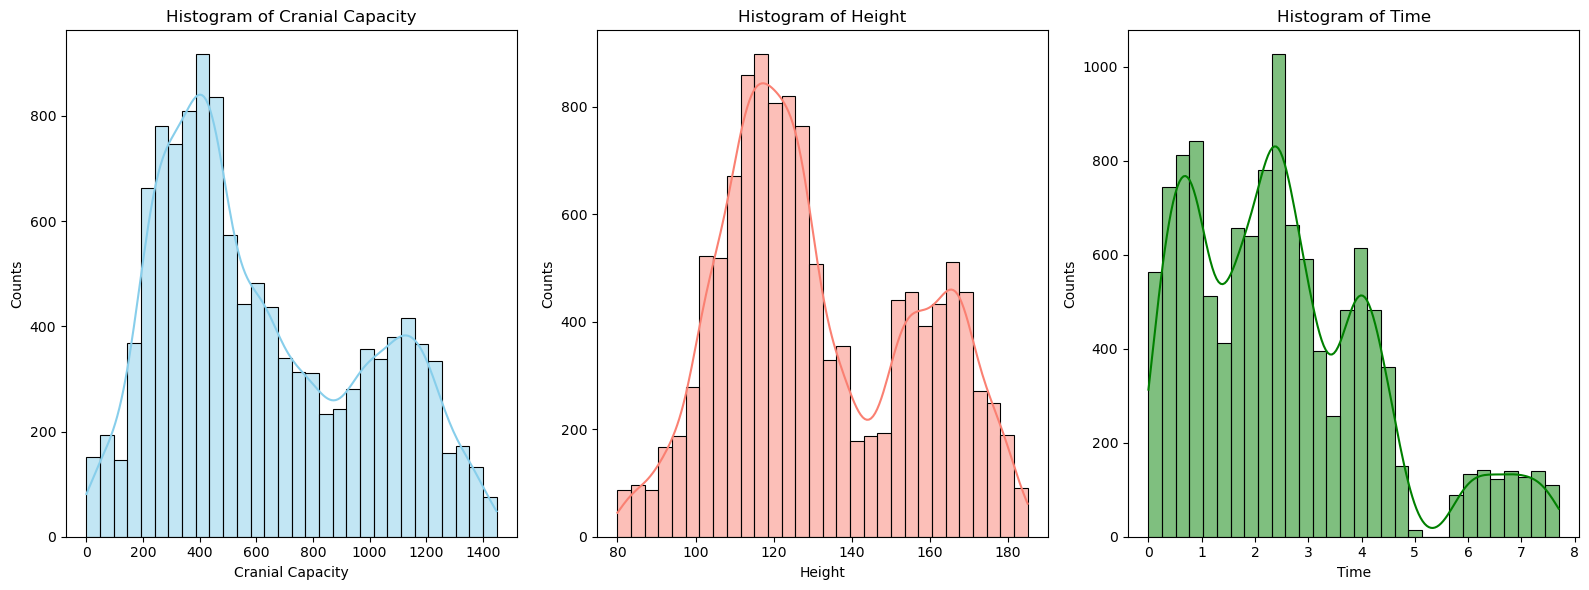

In [49]:
Time = data['Time']
cranial_capacity = data['Cranial_Capacity']
height = data['Height']

# create subplots
fig, axs = plt.subplots(1, 3, figsize=(16, 6))

# plot histogram for cranial capacity
sns.histplot(cranial_capacity, bins = 30, kde = True, color = 'skyblue', edgecolor = 'black', ax = axs[0])
axs[0].set_title('Histogram of Cranial Capacity')
axs[0].set_xlabel('Cranial Capacity')
axs[0].set_ylabel('Counts')
axs[0].grid(False)

# plot histogram for height 
sns.histplot(height, bins = 30, kde = True, color = 'salmon', edgecolor = 'black', ax = axs[1])
axs[1].set_title('Histogram of Height')
axs[1].set_xlabel('Height')
axs[1].set_ylabel('Counts')
axs[1].grid(False)

# plot histogram for Time
sns.histplot(Time, bins = 30, kde = True, color = 'green', edgecolor = 'black', ax = axs[2])
axs[2].set_title('Histogram of Time')
axs[2].set_xlabel('Time')
axs[2].set_ylabel('Counts')
axs[2].grid(False)

# show the plot
plt.tight_layout()
plt.show()

### Ahora las categoricas

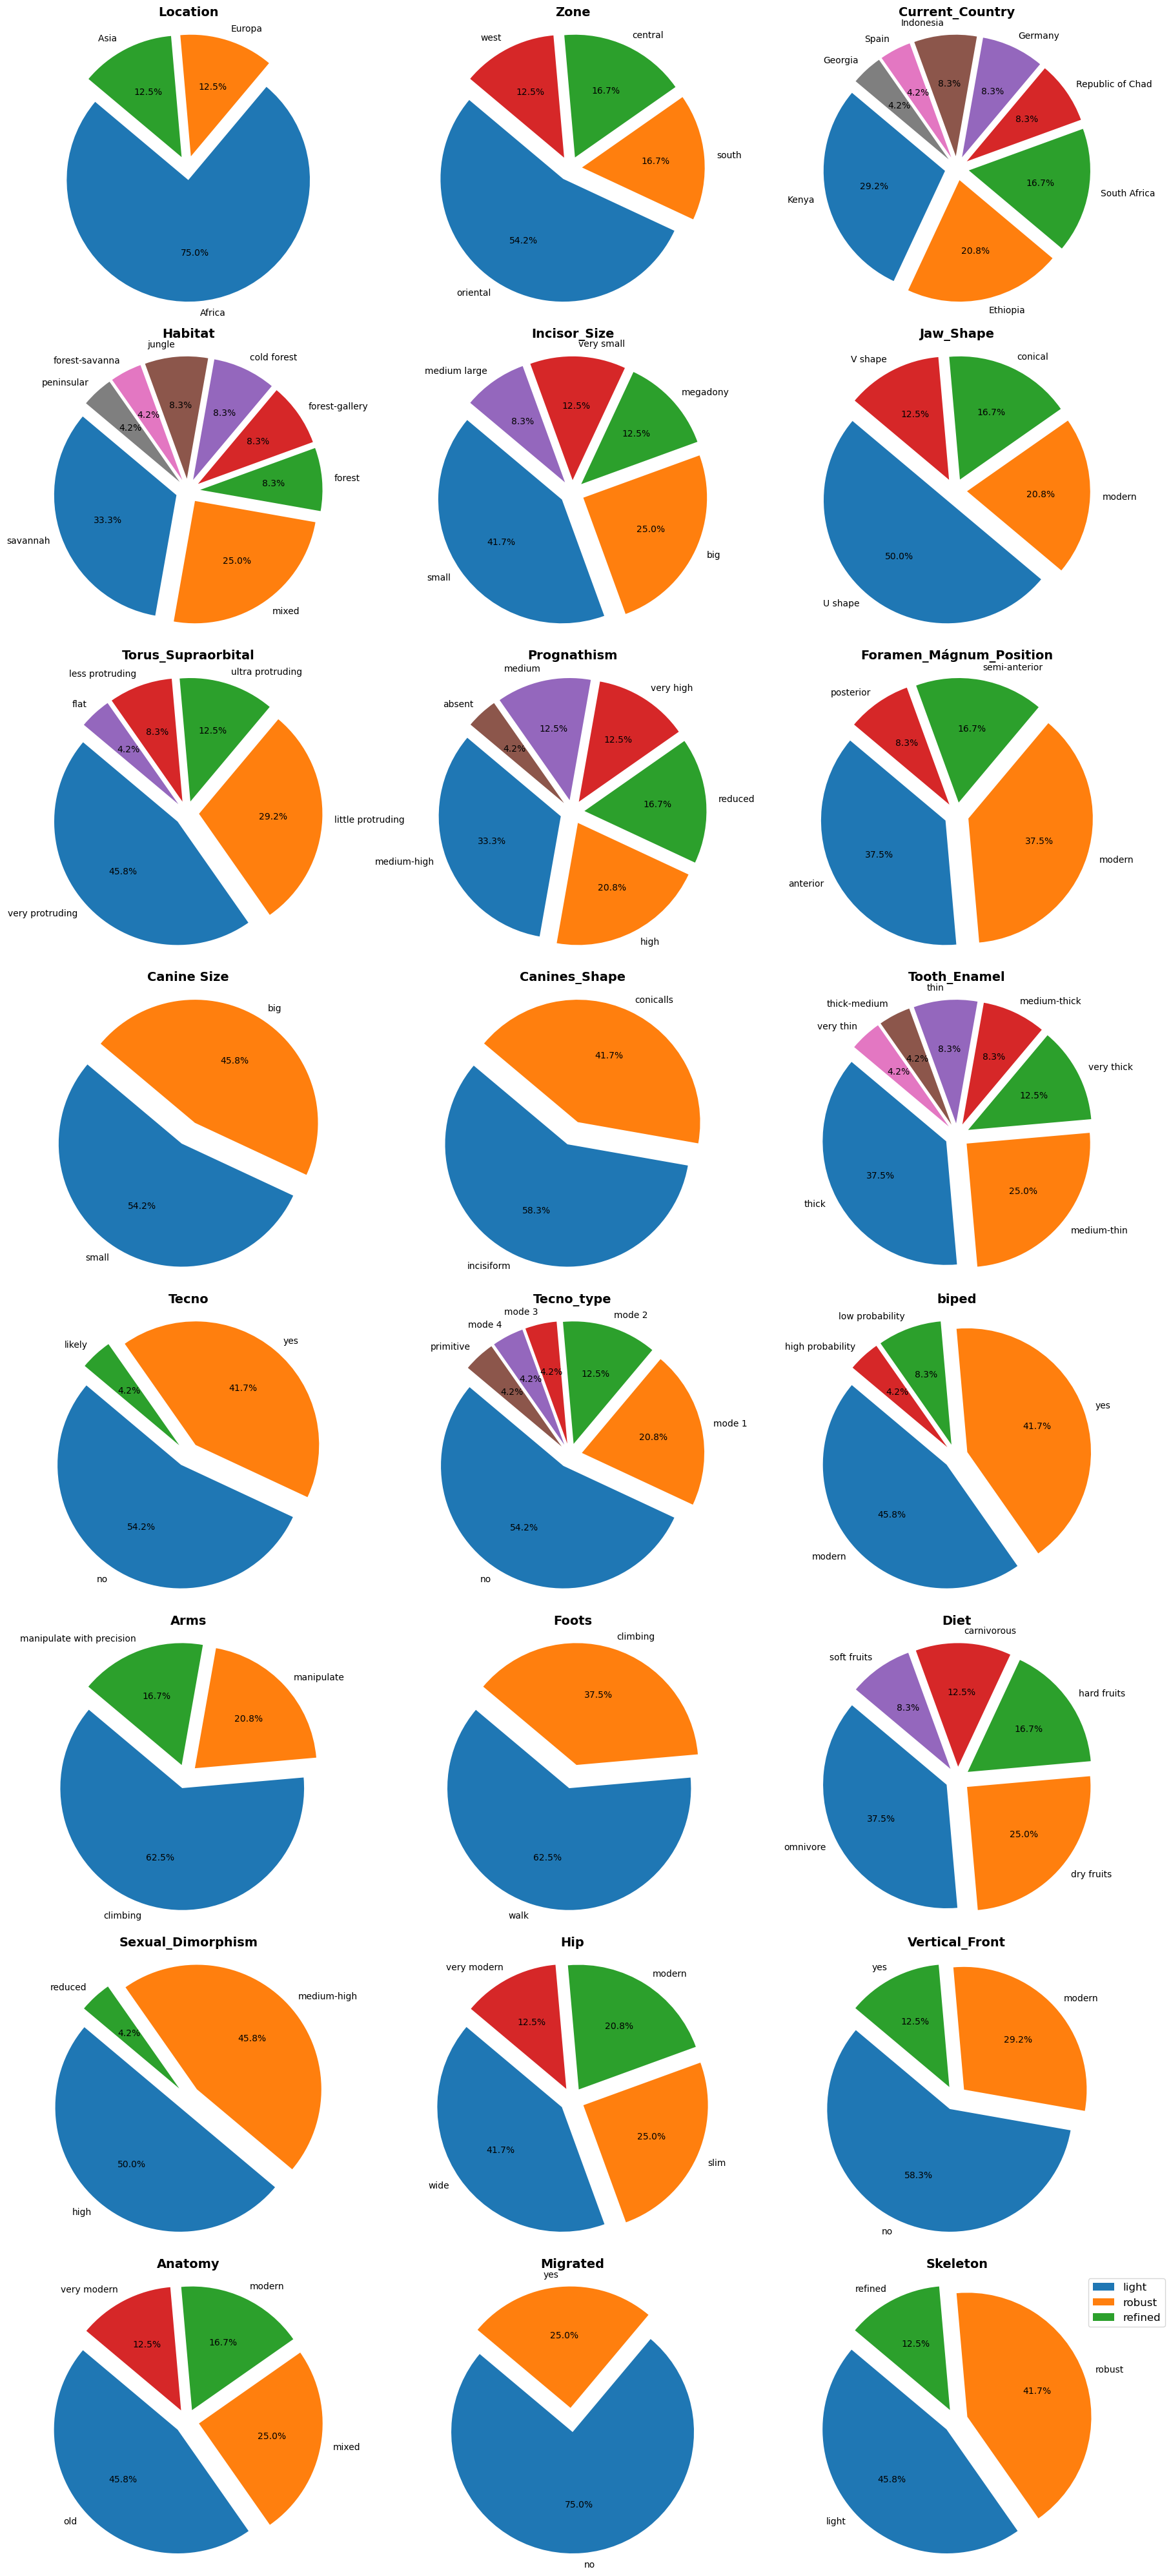

In [50]:

# calcular numero de filas necesarias de subplots
num_rows = (len(cat_features) + 2) // 3

# crear subplots
fig, axes = plt.subplots(num_rows, 3, figsize = (18, num_rows * 5))

# esto es para iterar facil 
axes = axes.flatten()

# plot graficas de pie para cada variakble categorica
for i, cat_feature in enumerate(cat_features):
    ax = axes[i]
    counts = data[cat_feature].value_counts()
    explode_values = [0.1] * len(counts) 
    ax.pie(counts, labels = counts.index, 
           autopct = '%1.1f%%', startangle = 140, 
            explode = explode_values, colors = plt.cm.tab10.colors[:len(counts)])
    ax.set_title(cat_feature, fontsize = 14, fontweight = 'bold')
    ax.axis('equal')

# eliminar subplots vacios
for i in range(len(cat_features), num_rows * 3):
    fig.delaxes(axes[i])

# leyendas 
plt.legend(loc = 'upper right', bbox_to_anchor = (1.2, 1), fontsize = 12)

# ajusatar layout
plt.tight_layout()
plt.show()

### Analizaremos  la varianza de las variables categóricas. Aquellas variables con mayor variabilidad pueden ser más informativas.



In [38]:
categorical_variables = data.select_dtypes(include=['object']).drop(columns=["Genus_&_Specie"]).columns
# Crear un DataFrame vacío para almacenar los resultados
resultsVariance = pd.DataFrame(columns=['Variable', 'Varianza'])

# Calcular la varianza de las categorías en cada variable categórica
for variable in categorical_variables:
    category_variance = data.groupby(variable).size().var()
    # Agregar los resultados al DataFrame
    resultsVariance.loc[len(resultsVariance)] = [variable, category_variance]

# Mostrar la tabla de resultados
print(resultsVariance)




                   Variable      Varianza
0                  Location  1.875000e+07
1                      Zone  5.500000e+06
2           Current_Country  1.142857e+06
3                   Habitat  1.642857e+06
4              Incisor_Size  2.675000e+06
5                 Jaw_Shape  4.166667e+06
6        Torus_Supraorbital  4.300000e+06
7               Prognathism  1.400000e+06
8   Foramen_Mágnum_Position  3.166667e+06
9               Canine Size  5.000000e+05
10            Canines_Shape  2.000000e+06
11             Tooth_Enamel  2.238095e+06
12                    Tecno  9.750000e+06
13               Tecno_type  5.500000e+06
14                    biped  6.833333e+06
15                     Arms  9.250000e+06
16                    Foots  4.500000e+06
17                     Diet  1.925000e+06
18        Sexual_Dimorphism  9.250000e+06
19                      Hip  2.166667e+06
20           Vertical_Front  7.750000e+06
21                  Anatomy  3.166667e+06
22                 Migrated  1.800

### Filtremos variables por encima de un umbral 

In [39]:

umbral= 5000000.0  

# Filtrar las variables con varianza mayor que el umbral
variables_categoricas_importantes = resultsVariance[resultsVariance['Varianza'] > umbral]['Variable'].tolist()

print("Variables con varianza importante:")
print(variables_categoricas_importantes)


Variables con varianza importante:
['Location', 'Zone', 'Tecno', 'Tecno_type', 'biped', 'Arms', 'Sexual_Dimorphism', 'Vertical_Front', 'Migrated']


### Ahora actualizaremos el data frame con nuestras variables ya filtradas

In [40]:
variables_continuas = ['Time', 'Cranial_Capacity', 'Height']
data_filtrado = data[['Genus_&_Specie'] + variables_categoricas_importantes + variables_continuas]
print(f"número de columnas:{len(data.columns)}")

número de columnas:28


### One-hot encoding a las variables categóricas

In [41]:
from sklearn.preprocessing import OneHotEncoder
# One-Hot Encoding para variables categóricas
encoder = OneHotEncoder(sparse=False, drop='first')
encoded_categorical = encoder.fit_transform(data_filtrado[variables_categoricas_importantes])

# Crear un DataFrame con las variables codificadas
encoded_df = pd.DataFrame(encoded_categorical, columns=encoder.get_feature_names_out(variables_categoricas_importantes))

# Combinar con las variables continuas y la variable objetivo
data_final = pd.concat([data_filtrado[['Genus_&_Specie']], data_filtrado[variables_continuas], encoded_df], axis=1)

# Mostrar las primeras filas del DataFrame final
data_final.head()


,Genus_&_Specie,Time,Cranial_Capacity,Height,Location_Asia,Location_Europa,Zone_oriental,Zone_south,Zone_west,Tecno_no,...,biped_low probability,biped_modern,biped_yes,Arms_manipulate,Arms_manipulate with precision,Sexual_Dimorphism_medium-high,Sexual_Dimorphism_reduced,Vertical_Front_no,Vertical_Front_yes,Migrated_yes
0,hominino Orrorin tugenencin,6.041124,144.51410,110.24323,0.0,0.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,hominino Ardipithecus ramidus,4.383910,293.96021,107.69018,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,Australopithecus Afarensis,3.749413,264.79849,123.76644,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Australopithecus Anamensis,4.595606,403.28047,111.40831,0.0,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Australopithecus Africanus,3.614060,679.15233,111.59004,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Exportemos nuestro df preprocesado para  el notebook de regresion

In [42]:
data_final.to_csv('dataframe_preprocesado.csv', index=False)


### División del conjunto de datos 

In [78]:
from sklearn.model_selection import train_test_split

# Definir variables predictoras y la variable objetivo
X = data_final.drop(columns=['Genus_&_Specie'])
y = data_final['Genus_&_Specie']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [51]:
X_train.shape


(8400, 25)

In [52]:
y_train.shape

(8400,)

### Normalización de los datos 

In [81]:
from sklearn.preprocessing import StandardScaler

# Normalizar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Construccion y evaluación de modelos

### Random forest

In [102]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Crear el modelo
model = RandomForestClassifier(random_state=42)

# Entrenar el modelo
model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test_scaled)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)

# Generar el informe de clasificación
class_report = classification_report(y_test, y_pred)

# Imprimir el informe de clasificación
print("Classification Report:\n", class_report)


Accuracy: 0.9380555555555555
Classification Report:
                                     precision    recall  f1-score   support

        Australopithecus Afarensis       0.78      0.77      0.78       151
        Australopithecus Africanus       1.00      1.00      1.00       142
        Australopithecus Anamensis       0.79      0.80      0.79       162
    Australopithecus Bahrelghazali       1.00      1.00      1.00       155
            Australopithecus Garhi       1.00      1.00      1.00       148
           Australopithecus Sediba       0.80      0.83      0.82       139
                    Homo Antecesor       1.00      1.00      1.00       146
                      Homo Erectus       1.00      1.00      1.00       139
                     Homo Ergaster       1.00      1.00      1.00       175
                 Homo Floresiensis       1.00      1.00      1.00       155
                    Homo Georgicus       1.00      1.00      1.00       150
                      Homo Habilis

### SVM


In [104]:
from sklearn.svm import SVC

model = SVC(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("SVM Report:\n", classification_report(y_test, y_pred))


SVM Accuracy: 0.9444444444444444
SVM Report:
                                     precision    recall  f1-score   support

        Australopithecus Afarensis       0.80      0.84      0.82       151
        Australopithecus Africanus       1.00      1.00      1.00       142
        Australopithecus Anamensis       0.85      0.81      0.83       162
    Australopithecus Bahrelghazali       1.00      1.00      1.00       155
            Australopithecus Garhi       1.00      1.00      1.00       148
           Australopithecus Sediba       0.80      0.86      0.83       139
                    Homo Antecesor       1.00      1.00      1.00       146
                      Homo Erectus       1.00      0.99      1.00       139
                     Homo Ergaster       1.00      1.00      1.00       175
                 Homo Floresiensis       1.00      1.00      1.00       155
                    Homo Georgicus       0.99      1.00      1.00       150
                      Homo Habilis       

### KNN

In [105]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred))
print("KNN Report:\n", classification_report(y_test, y_pred))


KNN Accuracy: 0.9413888888888889
KNN Report:
                                     precision    recall  f1-score   support

        Australopithecus Afarensis       0.82      0.80      0.81       151
        Australopithecus Africanus       1.00      1.00      1.00       142
        Australopithecus Anamensis       0.82      0.83      0.83       162
    Australopithecus Bahrelghazali       1.00      1.00      1.00       155
            Australopithecus Garhi       1.00      1.00      1.00       148
           Australopithecus Sediba       0.81      0.86      0.84       139
                    Homo Antecesor       1.00      1.00      1.00       146
                      Homo Erectus       1.00      1.00      1.00       139
                     Homo Ergaster       1.00      1.00      1.00       175
                 Homo Floresiensis       1.00      1.00      1.00       155
                    Homo Georgicus       1.00      1.00      1.00       150
                      Homo Habilis       

### Gradient boosting

In [106]:
from sklearn.ensemble import GradientBoostingClassifier

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, y_pred))
print("Gradient Boosting Report:\n", classification_report(y_test, y_pred))


Gradient Boosting Accuracy: 0.9352777777777778
Gradient Boosting Report:
                                     precision    recall  f1-score   support

        Australopithecus Afarensis       0.80      0.74      0.77       151
        Australopithecus Africanus       1.00      1.00      1.00       142
        Australopithecus Anamensis       0.79      0.83      0.81       162
    Australopithecus Bahrelghazali       1.00      0.99      1.00       155
            Australopithecus Garhi       1.00      1.00      1.00       148
           Australopithecus Sediba       0.77      0.84      0.81       139
                    Homo Antecesor       1.00      1.00      1.00       146
                      Homo Erectus       1.00      1.00      1.00       139
                     Homo Ergaster       1.00      1.00      1.00       175
                 Homo Floresiensis       1.00      1.00      1.00       155
                    Homo Georgicus       1.00      1.00      1.00       150
             

### Ajuste de hiperparametros para SVM

In [107]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Definir el espacio de hiperparámetros
param_grid = {
    'C': [0.1, 1, 10, 100],
    'gamma': [0.01, 0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly']
}

# Crear el modelo SVM
svm_model = SVC()

# Inicializar Grid Search
grid_search = GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, scoring='accuracy')

# Ejecutar Grid Search
grid_search.fit(X_train_scaled, y_train)

# Obtener los mejores hiperparámetros y el mejor modelo
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Imprimir los mejores hiperparámetros
print("Best Hyperparameters:", best_params)


Best Hyperparameters: {'C': 10, 'gamma': 10, 'kernel': 'rbf'}


### validación cruzada al modelo ajustado

In [109]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.svm import SVC

# Crear un nuevo modelo SVM con los mejores hiperparámetros encontrados
best_svm_model = SVC(C=10, gamma=10, kernel='rbf')

# Definir el esquema de validación cruzada (k-fold)
k_fold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Realizar la validación cruzada
cv_scores = cross_val_score(best_svm_model, X_train_scaled, y_train, cv=k_fold, scoring='accuracy')

# Imprimir los puntajes de validación cruzada
print("Cross-Validation Scores:", cv_scores)

# Calcular la precisión media y la desviación estándar de los puntajes
print("Mean Accuracy:", cv_scores.mean())
print("Standard Deviation of Accuracy:", cv_scores.std())


Cross-Validation Scores: [0.94583333 0.94404762 0.94285714 0.94166667 0.93690476]
Mean Accuracy: 0.9422619047619047
Standard Deviation of Accuracy: 0.00301169300968416


### ajustar nuevo modelo a nuestros datos y probar en datos de test

In [115]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Crear un nuevo modelo SVM con los mejores hiperparámetros encontrados
best_svm_model = SVC(C=10, gamma=10, kernel='rbf')

# Entrenar el modelo con los datos de entrenamiento
best_svm_model.fit(X_train_scaled, y_train)

# Predecir en el conjunto de prueba
y_pred_test = best_svm_model.predict(X_test_scaled)

# Calcular la precisión del modelo en el conjunto de prueba
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Accuracy on Test Set:", accuracy_test)
report = classification_report(y_test, y_pred_test)

# Imprimir el informe de clasificación
print(report)



Accuracy on Test Set: 0.9372222222222222
                                    precision    recall  f1-score   support

        Australopithecus Afarensis       0.78      0.79      0.79       151
        Australopithecus Africanus       1.00      1.00      1.00       142
        Australopithecus Anamensis       0.81      0.79      0.80       162
    Australopithecus Bahrelghazali       1.00      1.00      1.00       155
            Australopithecus Garhi       1.00      1.00      1.00       148
           Australopithecus Sediba       0.80      0.83      0.81       139
                    Homo Antecesor       1.00      1.00      1.00       146
                      Homo Erectus       1.00      1.00      1.00       139
                     Homo Ergaster       1.00      1.00      1.00       175
                 Homo Floresiensis       1.00      1.00      1.00       155
                    Homo Georgicus       1.00      1.00      1.00       150
                      Homo Habilis       1.00 

## Conclusión
 Descubrimos que svm es el modelo que mejor clasifica
 con una precision promedio de 94.22 en conjunto de train y 93.72 en conjunto de test, clasificando "Genus&Specie" satisfactoriamente 